In [32]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import tqdm as tqdm

In [33]:
class_names=['balcony','corridor','lobby','room','terrace']
class_names_labels={class_name:i for i, class_name in enumerate(class_names)}
nb_classes=len(class_names)
print(class_names_labels)
IMAGE_SIZE=[300,300]

{'balcony': 0, 'corridor': 1, 'lobby': 2, 'room': 3, 'terrace': 4}


In [34]:
# loading data
def load_data():
    DIRECTORY=r"C:\Users\kumar\OneDrive\Desktop\ml\image_classifier\hotel"
    CATEGORY=["train","test"]

    output=[]

    for category in CATEGORY:
        path=os.path.join(DIRECTORY,category);
        print(path)
        images=[]
        labels=[]

        print("Loading {}".format(category))

        for folder in os.listdir(path):
            label=class_names_labels[folder]

            # iterate over each image in the folder
            for file in os.listdir(os.path.join(path,folder)):
                
                # get the path name of the image
                img_path=os.path.join(os.path.join(path,folder),file)

                # open and resize the image
                image=cv2.imread(img_path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,IMAGE_SIZE)

                #append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
        
        images=np.array(images,dtype='float32')
        labels=np.array(labels,dtype='int32')

        output.append((images,labels))
    
    return output

In [35]:
(train_images,train_labels),(test_images,test_labels)=load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

C:\Users\kumar\OneDrive\Desktop\ml\image_classifier\hotel\train
Loading train
C:\Users\kumar\OneDrive\Desktop\ml\image_classifier\hotel\test
Loading test


In [36]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config=ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction=0.5
config.gpu_options.allow_growth=True
session=InteractiveSession(config=config)

c:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\client\session.py:1770: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [37]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob

In [38]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [39]:
for layer in vgg16.layers:
    layer.trainable=False

In [40]:
x=Flatten()(vgg16.output)

In [41]:
prediction=Dense(5,activation='softmax')(x)
model=Model(inputs=vgg16.input,outputs=prediction)

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images, test_labels))

Epoch 1/5


c:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 351s 48s/step - loss: 2.7564 - accuracy: 0.3480 - val_loss: 1.9844 - val_accuracy: 0.3700
Epoch 2/5
5/8 [=================>............] - ETA: 41s - loss: 1.0117 - accuracy: 0.6313

4/4 - 30s - loss: 19.2936 - accuracy: 0.6700 - 30s/epoch - 7s/step


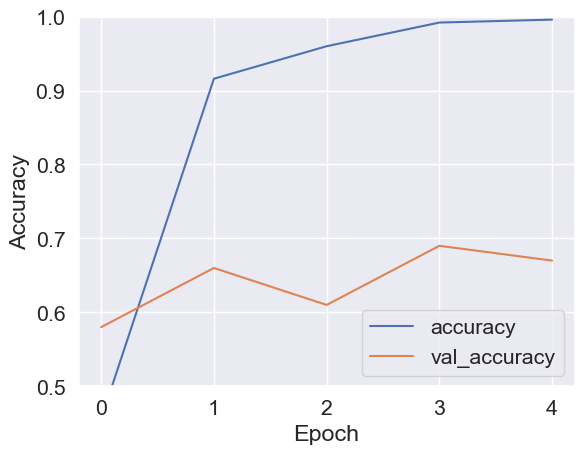

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6700000166893005
